# Monte Carlo Method

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
circ = lambda x: np.sqrt(1. - x**2)

In [4]:
def monte_carlo(my_func,a, b, N):
    """
    Use the Monte Carlo method to evaluate the area of my_func
    
    Input:
        my_func : function to evaluate
        a       : left bound
        b       : right bound (b>a)
        N       : number of random number samples
        
    Return:
        area of my function
    
    """
    xx = np.linspace(a,b,N)
    yy = circ(xx)
    samples_x = a + (b-a)*np.random.rand(N)
    samples_f = np.random.rand(N)
    print(samples_f)
    fx        = circ(samples_x)
    maxf      = max(fx)
    samples_f = samples_f*maxf
    
    count=0
    
    for i in range(N):
        if (yy[i]>=samples_f[i]):
            count=count+1
            
    answer=count/N*((b-a)*maxf)  
    
#     list, = np.where(ans<0)
#     len(list)
    
    return answer

In [8]:
np.random.rand(100)

array([0.07819639, 0.50433186, 0.5823294 , 0.47205498, 0.18999244,
       0.25863628, 0.21231476, 0.13275379, 0.83288153, 0.02752697,
       0.16194181, 0.48463315, 0.79807369, 0.2460723 , 0.07192967,
       0.91256192, 0.24963327, 0.38092072, 0.97198775, 0.37138215,
       0.63460412, 0.0030777 , 0.90749471, 0.08971431, 0.35486043,
       0.47551426, 0.91633299, 0.30106689, 0.01451073, 0.01487752,
       0.83047764, 0.72586984, 0.36435141, 0.59218296, 0.74154188,
       0.93676719, 0.45834136, 0.15832064, 0.26822098, 0.1176624 ,
       0.53621802, 0.81259598, 0.19534459, 0.12612956, 0.38075394,
       0.19278319, 0.93024336, 0.39219043, 0.09960178, 0.15355546,
       0.60484403, 0.24737821, 0.3859187 , 0.00896743, 0.2352854 ,
       0.79330991, 0.77933279, 0.38646244, 0.15079024, 0.07934718,
       0.93273631, 0.00973445, 0.14589372, 0.53843281, 0.51313104,
       0.51380031, 0.72808464, 0.75485448, 0.20736763, 0.23924917,
       0.41007566, 0.37312717, 0.06230172, 0.61152806, 0.91485

In [5]:
monte_carlo(circ,-1,1,N=100000)

[0.33175542 0.47037114 0.66764896 ... 0.65584337 0.89579198 0.83099197]


1.5706999999895628

In [42]:
print(2.*monte_carlo(circ,-1,1,N=100000))

3.14135999894428


(0.0, 1.0)

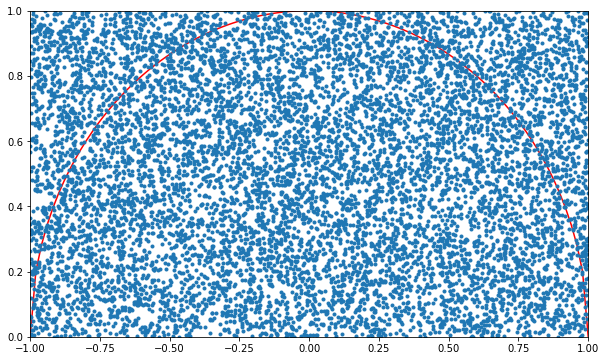

In [8]:
N = 10000
a = -1.
b = 1.
plt.figure(figsize=(10,6))

xx = np.linspace(a,b,100)
yy = circ(xx)
samples_x = a + (b-a)*np.random.rand(N)
samples_f = np.random.rand(N)
fx        = circ(samples_x)
maxf      = max(fx)
samples_f = samples_f*maxf
plt.plot(xx,yy,'r-')
plt.plot(samples_x,samples_f,'.')
plt.xlim([-1,1])
plt.ylim([0,1])

In [43]:
import random
random.random() 

0.25910503915945116

In [44]:
np.random.random_sample()

0.1873175087522856

## Bad random number generator

In [45]:
class BadRandom():
    def __init__(self,seed=1):
        self.x0 = seed
        self.a = 65539  #1664525
        self.b = 0      #1013904223
        self.M = 2**16  #2**32
        return
    def randomInt(self):
        a = self.a
        b = self.b
        M = self.M
        rand = (a*self.x0 +b)%M
        self.x0 = rand
        return rand
    def random_sample(self):
        return (self.randomInt()/self.M)
    def random(self,size):
        rand_func = lambda x: self.random_sample()
        rands = [rand_func(i) for i in range(size)]
        return np.array(rands)

In [46]:
rand = BadRandom(seed = 10)

In [47]:
print(rand.random(30))

[4.57763672e-04 1.37329102e-03 4.11987305e-03 1.23596191e-02
 3.70788574e-02 1.11236572e-01 3.33709717e-01 1.12915039e-03
 3.38745117e-03 1.01623535e-02 3.04870605e-02 9.14611816e-02
 2.74383545e-01 8.23150635e-01 4.69451904e-01 4.08355713e-01
 2.25067139e-01 6.75201416e-01 2.56042480e-02 7.68127441e-02
 2.30438232e-01 6.91314697e-01 7.39440918e-02 2.21832275e-01
 6.65496826e-01 9.96490479e-01 9.89471436e-01 9.68414307e-01
 9.05242920e-01 7.15728760e-01]


(0.0, 1.0)

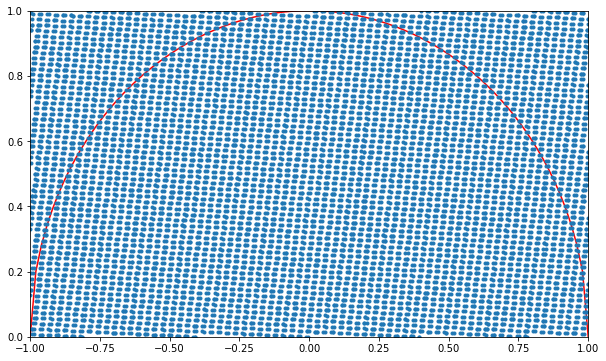

In [54]:
N = 10000
a = -1.
b = 1.
rand = BadRandom(seed = 10)
plt.figure(figsize=(10,6))

xx = np.linspace(a,b,100)
yy = circ(xx)
samples_x = a + (b-a)*rand.random(N)
samples_f = rand.random(N)
fx        = circ(samples_x)
maxf      = max(fx)
samples_f = samples_f*maxf
plt.plot(xx,yy,'r-')
plt.plot(samples_x,samples_f,'.')
plt.xlim([-1,1])
plt.ylim([0,1])